Question 1

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import linear_model as lm
import matplotlib
import matplotlib.pyplot as plt

# Import the car data
dat = pd.read_csv('e_car_data.csv')
dat.columns = list(dat)
dat = dat[['accept', 'tier', 'amount', 'apr', 'prime']]
dat.head()

,accept,tier,amount,apr,prime
0,0,2,21000.00,6.19,1.8388
1,1,4,18888.75,7.99,1.8388
2,0,1,35000.00,5.85,1.8388
3,1,2,16510.00,6.19,1.8388
4,0,1,27000.00,5.85,1.8388


In [14]:
# Construct the logistic regression model
x = dat.iloc[:,1:5].values
y = dat.iloc[:,0].values
print("Fraction of loans accepted:", '%.4f'% np.mean(y))

logistic=lm.LogisticRegression() # Create an object of class LogisticRegression
model = logistic.fit(x,y) # Fit the logistic model
print("\nintercept =", '%.4f'% model.intercept_, # Print the estimated parameters
      "\ncoef_tier =", '%.4f'% model.coef_[0][0],
      "\ncoef_amount =", '%.4f'% model.coef_[0][1],
      "\ncoef_apr =", '%.4f'% model.coef_[0][2],
      "\ncoef_prime =", '%.4f'% model.coef_[0][3]) 


ypred = model.predict_proba(x) # Get the fitted values
print("\nRMSE of logistic prediction of probability:", '%.4f'% np.std(y-ypred[:,1])) # Print the RMSE between actual and predicted acceptance

Fraction of loans accepted: 0.4506

intercept = 0.0430 
coef_tier = 0.0399 
coef_amount = -0.0001 
coef_apr = 0.0940 
coef_prime = 0.0502

RMSE of logistic prediction of probability: 0.4716


In [15]:
# Calculate the fraction of acceptance for each bin
accept = np.concatenate([dat.iloc[:,0:1].values, ypred[:,1:2]], axis=1)
c = np.zeros(5)
d = np.zeros(5)
sep = np.linspace(0,1,6)
for n in range(5):
    temp = np.zeros((0,2))
    for i in range(len(accept)): 
        if ((accept[:,1][i]>=sep[n]) and (accept[:,1][i]<sep[n+1])):
            temp = np.concatenate([temp, accept[i:(i+1),:]], axis=0)
    d[n] = len(temp)
    if (len(temp)==0): # If the bin is empty
        c[n] = 0 
    else:
        c[n] = np.sum(temp[:,0]) / len(temp)
print(c,)
print(d)

[0.1611002  0.29798089 0.62209608 0.51737452 0.        ]
[1018. 9212. 9513. 1036.    0.]


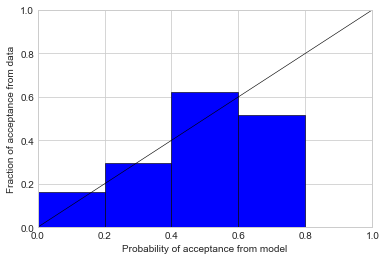

In [11]:
# Plotting the fraction of acceptance
v = np.linspace(0, 10, 1000)
plt.style.use('seaborn-whitegrid')
plt.bar(sep[:5], c, width=0.2, color='blue', align='edge', edgecolor='black', linewidth=0.6)
plt.plot([0, 0], [1, 1], 'k-', linewidth=1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Probability of acceptance from model')
plt.ylabel('Fraction of acceptance from data')
plt.plot(v, v+0, linestyle='solid', color='black', linewidth=0.6)
plt.show()

In [16]:
customer_1 = np.array([[2, 18000, 5, 2.13]])
customer_2 = np.array([[2, 30000, 5, 2.13]]) 
print("The acceptance probability of customer 1:", '%.4f'% model.predict_proba(customer_1)[:,1])
print("The acceptance probability of customer 2:", '%.4f'% model.predict_proba(customer_2)[:,1])

The acceptance probability of customer 1: 0.4370
The acceptance probability of customer 2: 0.2914


Question 2

In [17]:
from bs4 import BeautifulSoup
import re, urllib.parse, urllib.request
import html5lib

# Initializing
url = "http://www8.gsb.columbia.edu"
maxNumUrl = 50
keywords = ['finance', 'engineering', 'business', 'research']

urls = dict([(url,1)])
seen = dict([])
opened = []

while len(urls)>0 and len(opened)<maxNumUrl:
    try:
        urls_temp = sorted(urls.items(), key=lambda x:x[1], reverse=True)
        curr_url = urls_temp.pop(0)[0] # Pop the highest scoring url from urls
        urls.pop(curr_url) # Remove that url with its score in urls
        print("Number of URLs in stack: %d" % len(urls))
        webpage = urllib.request.urlopen(curr_url)
        opened.append(curr_url) # Assign the curr_url to opnned 
    except Exception as ex: # If urlopen() fails
        print(ex)
        continue # Skip the code below
        
    soup = BeautifulSoup(webpage, "html5lib")
    htmltext = soup.body.get_text() # Get the body text of the webpage
    score = 0 # Initialize the score of the webpage
    for n in range(len(keywords)): # Calculate the total occurances of the keywords
        score += len(re.findall(keywords[n], str(htmltext).lower()))
    seen[curr_url] = score # Add this curr_url with its score to seen
    
    if (score>0):
        for tag in soup.find_all('a', href = True):
            childUrl = tag['href'] # Extract the link in curr_url
            childUrl = urllib.parse.urljoin(url, childUrl) # Join the url with childUrl
            if url in childUrl and childUrl not in list(seen.keys()):
                urls[childUrl] = score # If childUrl is not in seen, then add it along with its score to urls
    
print("Number of URLs in urls = %d, and seen = %d, and scanned (opened) = %d" % 
      (len(urls), len(seen), len(opened)))

s = sorted(seen.items(), key = lambda x:x[1], reverse = True)
N = 25 # Set Top_n
for n in range(N):
    print("Link: " + str(s[n][0]) + " ; " + "Score: " + str(s[n][1]))

Number of URLs in stack: 0
Number of URLs in stack: 139
Number of URLs in stack: 138
Number of URLs in stack: 212
Number of URLs in stack: 211
Number of URLs in stack: 223
Number of URLs in stack: 222
Number of URLs in stack: 246
Number of URLs in stack: 251
Number of URLs in stack: 250
Number of URLs in stack: 259
Number of URLs in stack: 296
Number of URLs in stack: 295
Number of URLs in stack: 367
Number of URLs in stack: 380
Number of URLs in stack: 379
Number of URLs in stack: 479
Number of URLs in stack: 478
Number of URLs in stack: 595
Number of URLs in stack: 595
Number of URLs in stack: 596
Number of URLs in stack: 595
Number of URLs in stack: 597
Number of URLs in stack: 598
Number of URLs in stack: 597
Number of URLs in stack: 596
Number of URLs in stack: 596
Number of URLs in stack: 595
Number of URLs in stack: 598
Number of URLs in stack: 603
Number of URLs in stack: 605
Number of URLs in stack: 609
Number of URLs in stack: 609
Number of URLs in stack: 611
Number of URLs i

Questions regarding Question2:
1. Call which method to parse the body text?
2. For some of the urls, the calculated score is different from manually added score. Why?